I obtain the dataset of Monthly Container Holding of Ports in South Korea from the link :
https://www.kaggle.com/code/skyil7/forecasting-empty-container-with-linear-regression/notebook

In this Notebook, I apply Multiple Linear Regression to predict When will the cointainer in Hoarbor in some harbors i South Korea will be empty. the independent variables satisfied the multilinear regression were Empty_10, Full_20, Empty_20, Full_40, and Full_other=0. I seperately apply the multiple linear regression to 4 different Harbors out of 10 harbors from dataset. 

the available of Container in Harbor is very important for the import and export process. Of course the Export and Import process are the two of many aspects to keep the sustainability of the country's economy.

This prediction aims to help the stakeholder of Harbor to provide the cointainer (at least 7 days) before the stock is fully empty. but the abundant of cointainer in harbor can cause the congestion in harbor too

In [185]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# EDA

As usual, let's start our process with EDA, to see the statistic of the distribution of container. And also let's do some preprocessing to our dataset.

In [186]:
data_set = pd.read_csv('container.csv')

In [187]:
data_set.head()

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
0,0,Busan,2018-01-01,True,165.0,273.0,61282.0,15753.0,59612.0,13995.0,147.0,67.0,3862353.0
1,1,Busan,2018-01-01,False,161.0,133.0,338680.0,74981.0,441504.0,83605.0,2879.0,705.0,26086071.0
2,2,Busan,2018-02-01,True,131.0,180.0,58404.0,14942.0,55317.0,12530.0,89.0,18.0,3507757.0
3,3,Busan,2018-02-01,False,197.0,130.0,329184.0,71048.0,440318.0,84009.0,3022.0,913.0,26385908.0
4,4,Busan,2018-03-01,True,90.0,176.0,62388.0,14732.0,59900.0,13404.0,94.0,116.0,3782328.0


In [188]:
data_set.describe()

,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,853.096552,90.206897,27286.101724,6891.624138,33426.268966,7623.848276,186.865517,85.843103,2.263406e+06
std,3506.945400,430.646554,77349.203427,16862.480938,105808.571846,21202.436938,705.362731,298.240119,7.010977e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,174.500000,93.000000,158.250000,52.000000,0.000000,0.000000,2.149000e+04
50%,0.000000,0.000000,1665.500000,526.000000,779.000000,511.500000,0.000000,0.000000,7.653650e+04
75%,3.000000,0.000000,9476.500000,5244.000000,6946.750000,2875.750000,2.250000,0.000000,5.099428e+05
max,25410.000000,5687.000000,390001.000000,87197.000000,522702.000000,117473.000000,3878.000000,2144.000000,3.755917e+07


In [189]:
data_set.isna().sum() #let's Check the missing value

Unnamed: 0       0
Harbor         116
Date           116
isKorean       116
Full_10        116
Empty_10       116
Full_20        116
Empty_20       116
Full_40        116
Empty_40       116
Full_other     116
Empty_other    116
R/T            116
dtype: int64

In [190]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   696 non-null    object 
 1   Harbor       580 non-null    object 
 2   Date         580 non-null    object 
 3   isKorean     580 non-null    object 
 4   Full_10      580 non-null    float64
 5   Empty_10     580 non-null    float64
 6   Full_20      580 non-null    float64
 7   Empty_20     580 non-null    float64
 8   Full_40      580 non-null    float64
 9   Empty_40     580 non-null    float64
 10  Full_other   580 non-null    float64
 11  Empty_other  580 non-null    float64
 12  R/T          580 non-null    float64
dtypes: float64(9), object(4)
memory usage: 70.8+ KB


In [191]:
data_set['Harbor'].unique() #to see what harbors are in the dataset

array(['Busan', 'Incheon', nan, 'Gyeongin Port', 'Daesan', 'Gunsan',
       'Mokpo', 'Gwangyang', 'Pohang', 'Masan', 'Ulsan'], dtype=object)

In [192]:
data_set['Harbor'].describe() #to see the specific info of the harbor

count       580
unique       10
top       Mokpo
freq         58
Name: Harbor, dtype: object

In [193]:
data_set['Harbor'].fillna('Gwangyang') #replace the missing values with the harbor whose top frequency

0      Busan
1      Busan
2      Busan
3      Busan
4      Busan
       ...  
691    Ulsan
692    Ulsan
693    Ulsan
694    Ulsan
695    Ulsan
Name: Harbor, Length: 696, dtype: object

In [194]:
#because the total of missing value is less than 25% of dataset, I decide to drop all the missing value instead replacing them with other variables (mean, median or mode)
data_set=data_set.dropna()
data_set

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
0,0,Busan,2018-01-01,True,165.0,273.0,61282.0,15753.0,59612.0,13995.0,147.0,67.0,3862353.0
1,1,Busan,2018-01-01,False,161.0,133.0,338680.0,74981.0,441504.0,83605.0,2879.0,705.0,26086071.0
2,2,Busan,2018-02-01,True,131.0,180.0,58404.0,14942.0,55317.0,12530.0,89.0,18.0,3507757.0
3,3,Busan,2018-02-01,False,197.0,130.0,329184.0,71048.0,440318.0,84009.0,3022.0,913.0,26385908.0
4,4,Busan,2018-03-01,True,90.0,176.0,62388.0,14732.0,59900.0,13404.0,94.0,116.0,3782328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,691,Ulsan,2020-03-01,False,0.0,0.0,12136.0,7000.0,3203.0,2300.0,0.0,0.0,388969.0
692,692,Ulsan,2020-04-01,True,0.0,0.0,6065.0,3147.0,686.0,822.0,0.0,0.0,152964.0
693,693,Ulsan,2020-04-01,False,0.0,0.0,11019.0,8799.0,2607.0,2273.0,0.0,0.0,336546.0
694,694,Ulsan,2020-05-01,True,0.0,0.0,6658.0,4960.0,877.0,457.0,0.0,0.0,172761.0


In [195]:
data_set.isna().sum() #check the missing value once again

Unnamed: 0     0
Harbor         0
Date           0
isKorean       0
Full_10        0
Empty_10       0
Full_20        0
Empty_20       0
Full_40        0
Empty_40       0
Full_other     0
Empty_other    0
R/T            0
dtype: int64

In [196]:
data_set.corr() #let's see the correlation between each vaiables

,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
Full_10,1.000000,0.702718,-0.071825,-0.085047,-0.063472,-0.072635,-0.053200,-0.058945,-0.062741
Empty_10,0.702718,1.000000,0.018364,0.008008,0.021945,0.013313,0.023546,0.015492,0.023231
Full_20,-0.071825,0.018364,1.000000,0.991661,0.997392,0.985030,0.980740,0.937234,0.994995
Empty_20,-0.085047,0.008008,0.991661,1.000000,0.985468,0.986720,0.962883,0.933762,0.982500
Full_40,-0.063472,0.021945,0.997392,0.985468,1.000000,0.987015,0.989400,0.945159,0.996645
Empty_40,-0.072635,0.013313,0.985030,0.986720,0.987015,1.000000,0.968207,0.950296,0.978739
Full_other,-0.053200,0.023546,0.980740,0.962883,0.989400,0.968207,1.000000,0.943581,0.988295
Empty_other,-0.058945,0.015492,0.937234,0.933762,0.945159,0.950296,0.943581,1.000000,0.942788
R/T,-0.062741,0.023231,0.994995,0.982500,0.996645,0.978739,0.988295,0.942788,1.000000


Let's analyze the normal distribution of each numerical independent variable

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

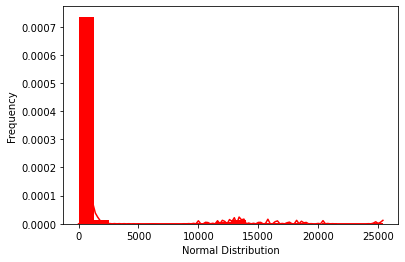

In [197]:
ax = sns.distplot(data_set['Full_10'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

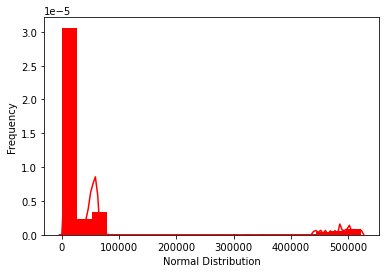

In [112]:
ax = sns.distplot(data_set['Full_40'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

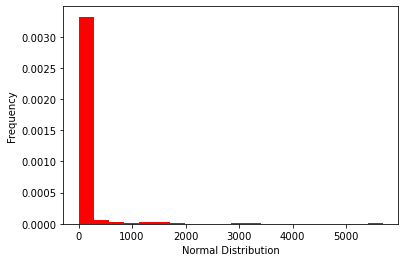

In [113]:
ax = sns.distplot(data_set['Empty_10'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

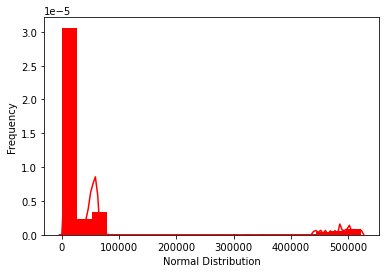

In [114]:
ax = sns.distplot(data_set['Full_40'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

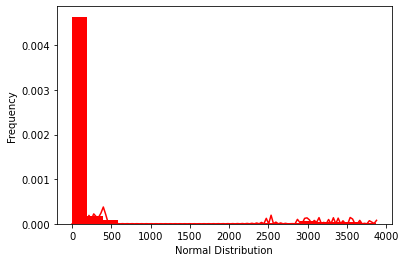

In [115]:
ax = sns.distplot(data_set['Full_other'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

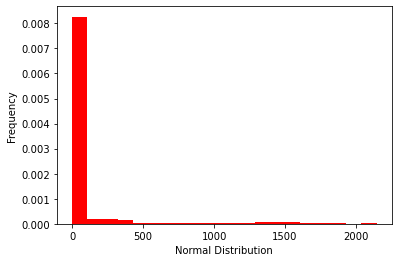

In [116]:
ax = sns.distplot(data_set['Empty_other'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

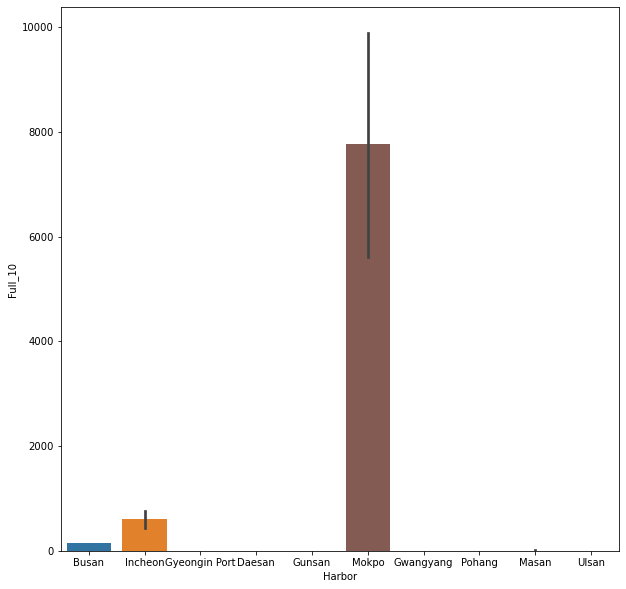

In [117]:
plt.figure(figsize= [10,10])
sns.barplot(x= 'Harbor', y= 'Full_10', data=data_set)

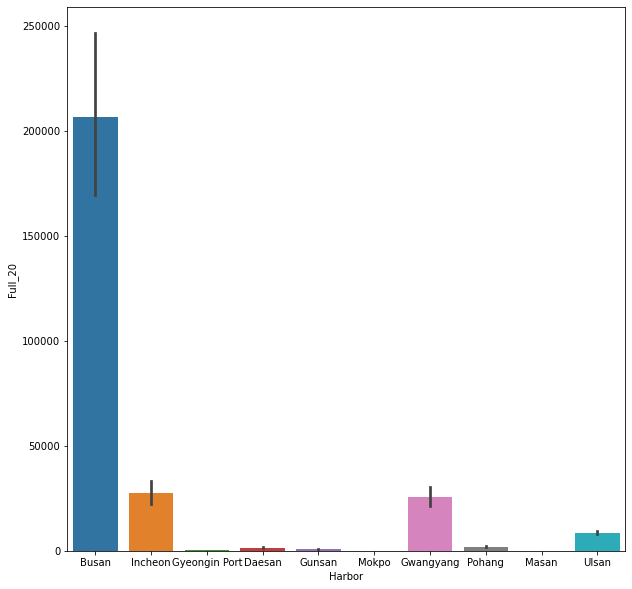

In [118]:
plt.figure(figsize= [10,10])
sns.barplot(x= 'Harbor', y= 'Full_20', data=data_set)

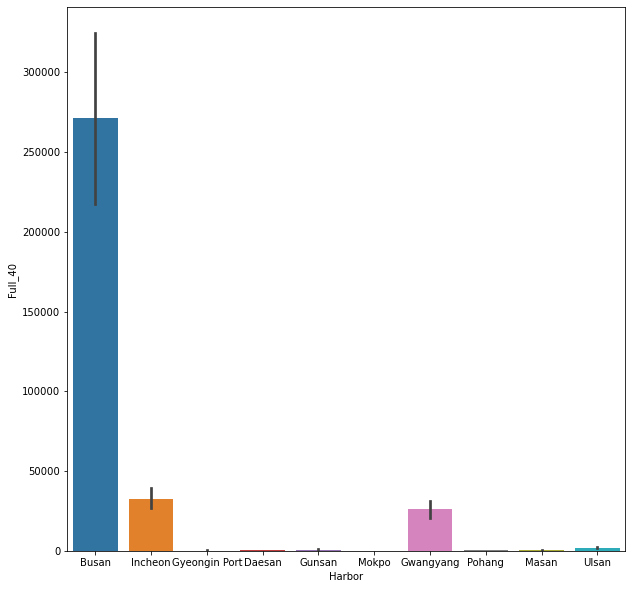

In [119]:
plt.figure(figsize= [10,10])
sns.barplot(x= 'Harbor', y= 'Full_40', data=data_set)

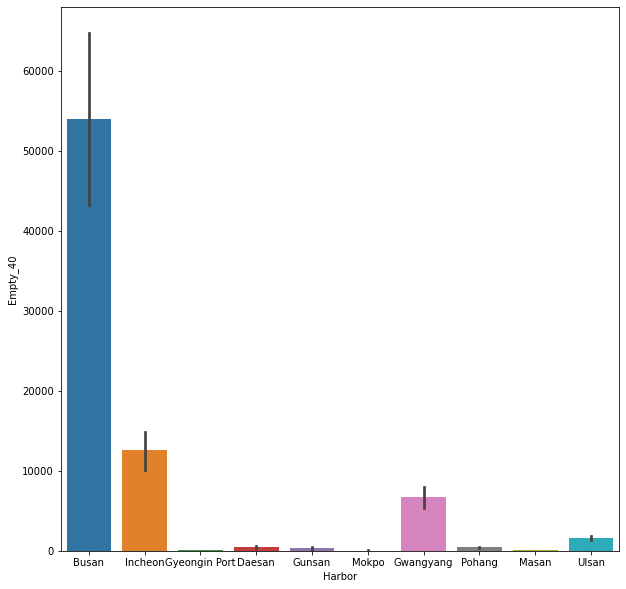

In [120]:
plt.figure(figsize= [10,10])
sns.barplot(x= 'Harbor', y= 'Empty_40', data=data_set)

In [121]:
data_set['Date'].unique() #let's see the dates of the dataset

array(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01'], dtype=object)

In [198]:
no_empty=data_set[data_set['Full_other']== 0]
no_empty

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
62,62,Incheon,2018-03-01,True,1071.0,0.0,7724.0,1520.0,8658.0,2800.0,0.0,7.0,522371.0
68,68,Incheon,2018-06-01,True,1546.0,0.0,9188.0,1549.0,9819.0,2642.0,0.0,0.0,659077.0
70,70,Incheon,2018-07-01,True,1781.0,0.0,8917.0,1449.0,9396.0,3163.0,0.0,0.0,586389.0
82,82,Incheon,2019-01-01,True,1274.0,0.0,7355.0,2147.0,8078.0,3795.0,0.0,2.0,502498.0
92,92,Incheon,2019-06-01,True,1081.0,0.0,7309.0,1192.0,8972.0,3192.0,0.0,1.0,573695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,691,Ulsan,2020-03-01,False,0.0,0.0,12136.0,7000.0,3203.0,2300.0,0.0,0.0,388969.0
692,692,Ulsan,2020-04-01,True,0.0,0.0,6065.0,3147.0,686.0,822.0,0.0,0.0,152964.0
693,693,Ulsan,2020-04-01,False,0.0,0.0,11019.0,8799.0,2607.0,2273.0,0.0,0.0,336546.0
694,694,Ulsan,2020-05-01,True,0.0,0.0,6658.0,4960.0,877.0,457.0,0.0,0.0,172761.0


# Incheon

In [203]:
incheon_data = no_empty[no_empty['Harbor']== 'Incheon']
incheon_data

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
62,62,Incheon,2018-03-01,True,1071.0,0.0,7724.0,1520.0,8658.0,2800.0,0.0,7.0,522371.0
68,68,Incheon,2018-06-01,True,1546.0,0.0,9188.0,1549.0,9819.0,2642.0,0.0,0.0,659077.0
70,70,Incheon,2018-07-01,True,1781.0,0.0,8917.0,1449.0,9396.0,3163.0,0.0,0.0,586389.0
82,82,Incheon,2019-01-01,True,1274.0,0.0,7355.0,2147.0,8078.0,3795.0,0.0,2.0,502498.0
92,92,Incheon,2019-06-01,True,1081.0,0.0,7309.0,1192.0,8972.0,3192.0,0.0,1.0,573695.0


In [204]:
X = incheon_data.iloc[:, [5,6,7,8,9,11]].values
y = incheon_data.iloc[:, [0]].values

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [207]:
y_pred = regressor.predict(X_test)
print("Prediction Vs Testing")
pd.DataFrame(y_pred,y_test)

Prediction Vs Testing


,0
"(70,)",80.534956


# Ulsan

In [208]:
Ulsan_data = no_empty[no_empty['Harbor']== 'Ulsan']
Ulsan_data

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
638,638,Ulsan,2018-01-01,True,0.0,0.0,6228.0,3289.0,1154.0,1022.0,0.0,0.0,176927.0
639,639,Ulsan,2018-01-01,False,0.0,0.0,10411.0,6724.0,2301.0,1876.0,0.0,0.0,316279.0
640,640,Ulsan,2018-02-01,True,0.0,0.0,5931.0,3048.0,971.0,994.0,0.0,0.0,167950.0
641,641,Ulsan,2018-02-01,False,0.0,0.0,8497.0,6142.0,2213.0,1815.0,0.0,0.0,272276.0
642,642,Ulsan,2018-03-01,True,0.0,0.0,6054.0,2303.0,1056.0,738.0,0.0,0.0,167903.0
643,643,Ulsan,2018-03-01,False,0.0,0.0,10737.0,6411.0,3422.0,2438.0,0.0,0.0,371517.0
644,644,Ulsan,2018-04-01,True,0.0,0.0,4987.0,3009.0,799.0,637.0,0.0,0.0,137762.0
645,645,Ulsan,2018-04-01,False,0.0,0.0,11626.0,7686.0,3445.0,3083.0,0.0,0.0,398019.0
646,646,Ulsan,2018-05-01,True,0.0,0.0,6212.0,2466.0,852.0,325.0,0.0,0.0,162176.0
647,647,Ulsan,2018-05-01,False,0.0,0.0,11120.0,6325.0,2708.0,1815.0,0.0,0.0,469462.0


In [209]:
X_ulsan = Ulsan_data.iloc[:, [5,6,7,8,9,11]].values
y_ulsan= Ulsan_data.iloc[:, [0]].values

In [210]:
X_train_ulsan, X_test_ulsan, y_train_ulsan, y_test_ulsan = train_test_split(X_ulsan, y_ulsan, test_size = 0.2, random_state = 0)

In [211]:
regressor_ulsan = LinearRegression()
regressor_ulsan.fit(X_train_ulsan,y_train_ulsan)

LinearRegression()

In [212]:
y_pred_ulsan = regressor_ulsan.predict(X_test_ulsan)
y_pred_ulsan

array([[670.97219941],
       [657.56181006],
       [657.1895709 ],
       [661.24589505],
       [684.12269925],
       [663.74244666],
       [664.59467679],
       [655.61100036],
       [670.39555595],
       [665.56495854],
       [657.19320261],
       [667.07247542]])

In [213]:
print("Prediction VS Testing")
pd.DataFrame(y_pred_ulsan, y_test_ulsan)

Prediction VS Testing


,0
"(673,)",670.972199
"(672,)",657.561810
"(680,)",657.189571
"(665,)",661.245895
"(649,)",684.122699
"(640,)",663.742447
"(671,)",664.594677
"(683,)",655.611000
"(660,)",670.395556
"(686,)",665.564959


# Daesan

In [215]:
Daesan_data = no_empty[no_empty['Harbor']== 'Daesan']
Daesan_data

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
290,290,Daesan,2018-01-01,True,0.0,0.0,290.0,0.0,105.0,80.0,0.0,0.0,10057.0
291,291,Daesan,2018-01-01,False,0.0,0.0,2781.0,729.0,1245.0,1000.0,0.0,0.0,105122.0
292,292,Daesan,2018-02-01,True,0.0,0.0,296.0,106.0,74.0,85.0,0.0,0.0,9053.0
293,293,Daesan,2018-02-01,False,0.0,0.0,2725.0,547.0,838.0,630.0,0.0,0.0,90260.0
294,294,Daesan,2018-03-01,True,0.0,0.0,255.0,70.0,142.0,154.0,0.0,0.0,10213.0
295,295,Daesan,2018-03-01,False,0.0,0.0,3250.0,1012.0,939.0,642.0,0.0,0.0,104138.0
296,296,Daesan,2018-04-01,True,0.0,0.0,213.0,30.0,60.0,160.0,0.0,0.0,6693.0
297,297,Daesan,2018-04-01,False,0.0,0.0,3151.0,181.0,1204.0,765.0,0.0,0.0,115459.0
298,298,Daesan,2018-05-01,True,0.0,0.0,1175.0,80.0,167.0,135.0,0.0,0.0,31671.0
299,299,Daesan,2018-05-01,False,0.0,0.0,3322.0,290.0,1058.0,455.0,0.0,0.0,107362.0


In [216]:
X_daesan = Daesan_data.iloc[:, [5,6,7,8,9,11]].values
y_daesan= Daesan_data.iloc[:, [0]].values

In [217]:
X_train_daesan, X_test_daesan, y_train_daesan, y_test_daesan = train_test_split(X_daesan, y_daesan, test_size = 0.2, random_state = 0)

In [218]:
regressor_daesan = LinearRegression()
regressor_daesan.fit(X_train_daesan,y_train_daesan)


LinearRegression()

In [219]:
y_pred_daesan = regressor_daesan.predict(X_test_daesan)
print("Prediction Vs Testing")
pd.DataFrame(y_pred_daesan,y_test_daesan)

Prediction Vs Testing


,0
"(325,)",331.434740
"(324,)",326.285377
"(332,)",314.391556
"(317,)",327.852197
"(301,)",319.002045
"(292,)",326.304724
"(323,)",324.889722
"(335,)",340.606998
"(312,)",318.616691
"(338,)",327.713518


# 'Pohang'

In [220]:
Pohang_data = no_empty[no_empty['Harbor']== 'Pohang']
Pohang_data

,Unnamed: 0,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
522,522,Pohang,2018-01-01,True,0.0,0.0,2825.0,503.0,583.0,348.0,0.0,0.0,89111.0
523,523,Pohang,2018-01-01,False,0.0,0.0,1682.0,516.0,630.0,704.0,0.0,0.0,70121.0
524,524,Pohang,2018-02-01,True,0.0,0.0,2318.0,451.0,683.0,315.0,0.0,0.0,75496.0
525,525,Pohang,2018-02-01,False,0.0,0.0,1582.0,340.0,584.0,301.0,0.0,0.0,64380.0
526,526,Pohang,2018-03-01,True,0.0,0.0,2425.0,325.0,641.0,337.0,0.0,7.0,75010.0
527,527,Pohang,2018-03-01,False,0.0,0.0,1795.0,1065.0,524.0,650.0,0.0,0.0,63317.0
528,528,Pohang,2018-04-01,True,0.0,0.0,2459.0,613.0,882.0,352.0,0.0,2.0,84208.0
531,531,Pohang,2018-05-01,False,0.0,0.0,1347.0,634.0,562.0,643.0,0.0,0.0,57588.0
532,532,Pohang,2018-06-01,True,0.0,0.0,2346.0,1024.0,662.0,338.0,0.0,0.0,76864.0
533,533,Pohang,2018-06-01,False,0.0,0.0,1282.0,576.0,453.0,235.0,0.0,0.0,50780.0


In [221]:
X_Pohang = Pohang_data.iloc[:, [5,6,7,8,9,11]].values
y_Pohang= Pohang_data.iloc[:, [0]].values

In [222]:
X_train_pohang, X_test_pohang, y_train_pohang, y_test_pohang = train_test_split(X_Pohang, y_Pohang, test_size = 0.2, random_state = 0)

In [223]:
regressor_pohang = LinearRegression()
regressor_pohang.fit(X_train_pohang,y_train_pohang)


LinearRegression()

In [224]:
y_pred_pohang = regressor_pohang.predict(X_test_pohang)
print("Prediction Vs Testing")
pd.DataFrame(y_pred_pohang,y_test_pohang)

Prediction Vs Testing


,0
"(554,)",554.080032
"(535,)",548.131049
"(534,)",555.353234
"(547,)",544.932424
"(524,)",550.145234
"(553,)",551.577107
"(574,)",554.099035
"(557,)",556.460018
"(551,)",550.073718
"(526,)",556.787852


This is the end of the code. From the results of prediction the have been obtained, we can conclude that the difference betweeen the prediction and the testing data is quite small. So, it will be reducing the error, but of course the smaller difference between prediction and testing data is the better. 
for the future, we can add another numerical independent variables to obtain more accurate prediction. But in my assumption what we get right now is enough :D.
